In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [27]:
import seaborn as sns

In [18]:
df = pd.read_csv('Student_Performance.csv')

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [19]:
duplicates = df.duplicated()
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 127


In [20]:
df = df.drop_duplicates()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [ ]:
df.info()

In [22]:
df = df.rename(columns={'Hours Studied': 'study_hrs', 'Previous Scores': 'prev_scores', 'Sample Question Papers Practiced': 'sample_papers', 'Performance Index': 'performance', 'Extracurricular Activities': 'extra_activities', 'Sleep Hours': 'sleep_hrs'})

In [23]:
df.columns

Index(['study_hrs', 'prev_scores', 'extra_activities', 'sleep_hrs',
       'sample_papers', 'performance'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.extra_activities = le.fit_transform(df.extra_activities)
df.head()

,study_hrs,prev_scores,extra_activities,sleep_hrs,sample_papers,performance
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


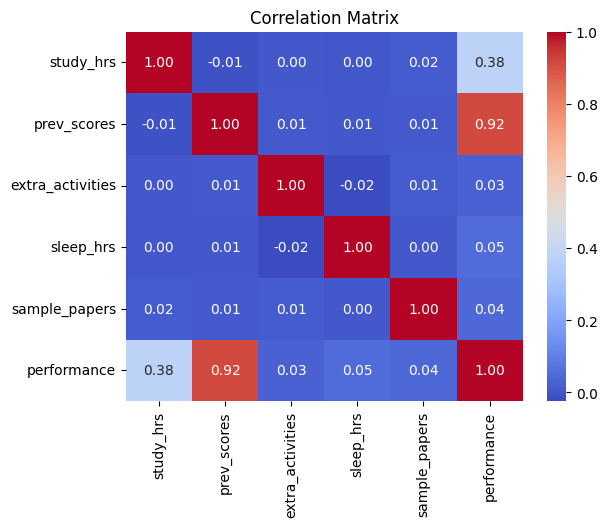

In [31]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [33]:
x = df['prev_scores']
y = df['performance']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(x_train.values.reshape(-1, 1), y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred = lr.predict(x_test.values.reshape(-1, 1))

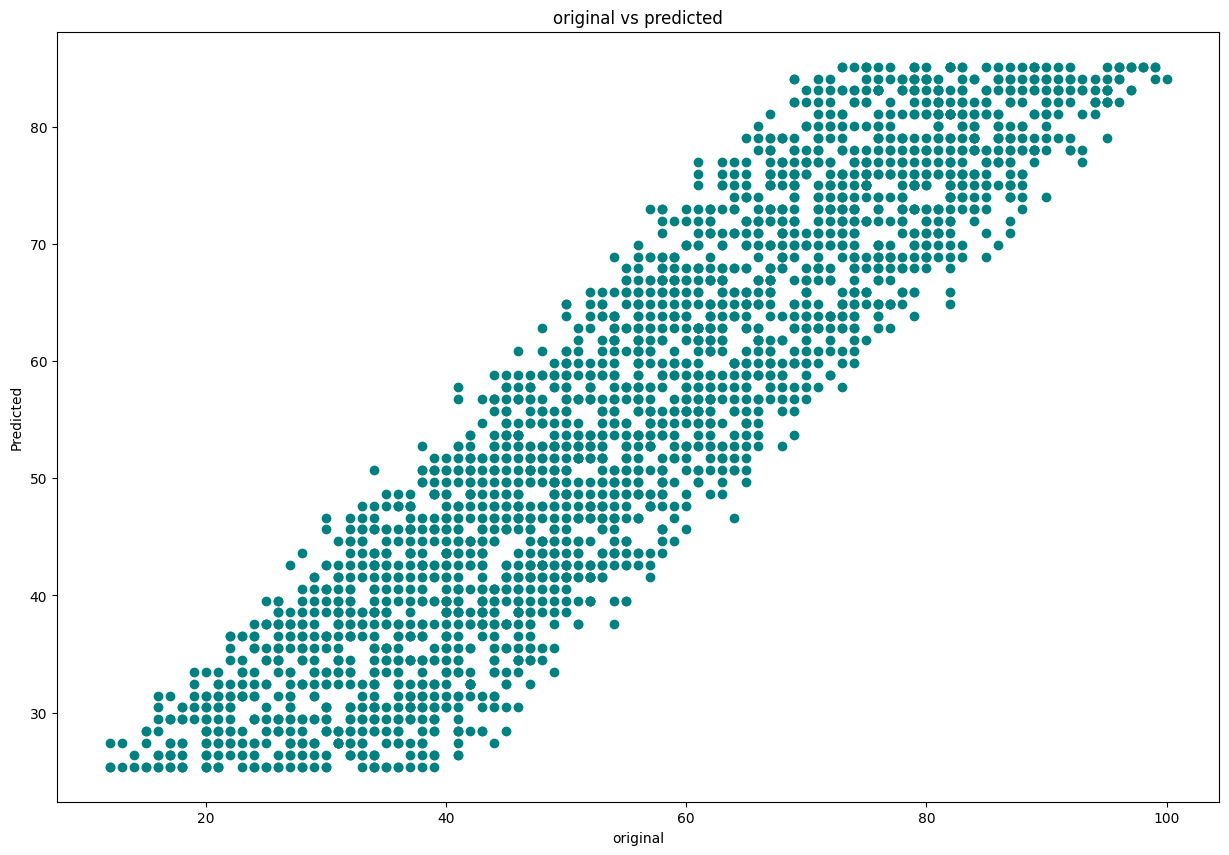

In [43]:
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred, c='teal')
plt.xlabel('original')
plt.ylabel('Predicted')
plt.title("original vs predicted")
plt.show()